In [69]:
# NumPy is the fundamental package for scientific computing
import numpy as np
# Pandas is a high-level data manipulation tool
import pandas as pd
# Matplotlib is a plotting library
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
#Scaling of dataset for training
from sklearn.preprocessing import StandardScaler

# import Warnings library and disable all warnings
import warnings 
warnings.filterwarnings('ignore')

# import Os and display the list of available data
import os
#print(os.listdir('../input'))

In [70]:
sns.__version__

'0.9.0'

In [71]:
# load train and test data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [72]:
# show train and test shape
print(f'Train data shape: {train_data.shape}\nTest data shape: {test_data.shape}')

Train data shape: (891, 12)
Test data shape: (418, 11)


In [73]:
# show the first five lines of train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
# show the first five lines of test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
# separate the PassengerId feature, which is needed to save the final result
test_id = test_data['PassengerId']

In [76]:
test_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [77]:
testid_ab = test_data[['Sex', 'Age']]

In [78]:
testid_ab.head()

,Sex,Age
0,male,34.5
1,female,47.0
2,male,62.0
3,male,27.0
4,female,22.0


In [79]:
# combine train and test data for further analysis and engineering
dataset = pd.concat((train_data, test_data), sort=True)
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [80]:
# drop PassengerId feature
dataset.drop(['PassengerId'], axis=1, inplace=True)
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [81]:
# show information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [82]:
# describe our dataset
dataset.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


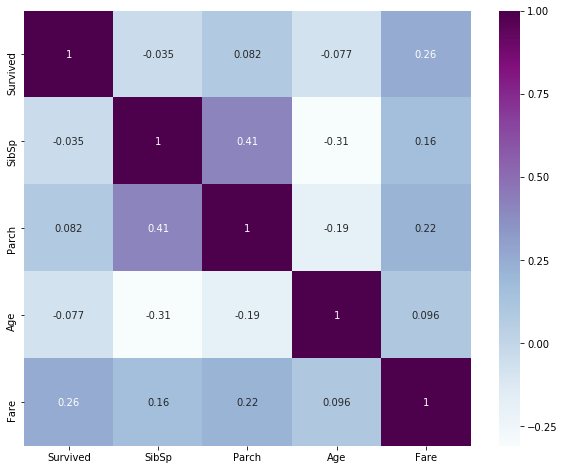

In [83]:
# correlation matrix between numerical values and Survived
fig, ax = plt.subplots(figsize=(10, 8))
plot = sns.heatmap(train_data[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, cmap='BuPu', ax=ax)

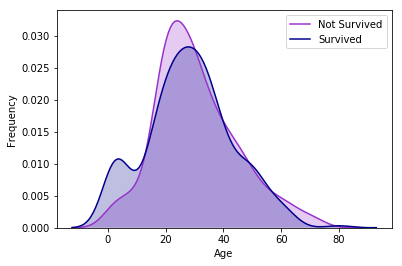

In [84]:
# explore Age distribution

plot = sns.kdeplot(train_data['Age'][(train_data['Survived'] == 0) &
                   (train_data['Age'].notnull())], color='darkorchid', shade=True)
plot = sns.kdeplot(train_data['Age'][(train_data['Survived'] == 1) & 
                   (train_data['Age'].notnull())], ax=plot, color='darkblue', shade=True)
plot.set_xlabel('Age')
plot.set_ylabel('Frequency')
plot = plot.legend(['Not Survived','Survived'])



In [85]:
# fill Age with the median age of similar rows according to Pclass, Parch and SibSp

# get indexes of null
null_age = list(dataset['Age'][dataset['Age'].isnull()].index)

for i in null_age:
    # get median value of age
    age_median = dataset['Age'].median()
    # get median age of similar rows according to Pclass, Parch and SibSp
    age_predict = dataset['Age'][((dataset['SibSp'] == dataset.iloc[i]['SibSp']) &
                                  (dataset['Parch'] == dataset.iloc[i]['Parch']) & 
                                  (dataset['Pclass'] == dataset.iloc[i]['Pclass']))].median()
    # if exists a similar value then fill the value of age_predict
    if not np.isnan(age_predict):
        dataset.loc[i, 'Age'] = age_predict
    # if not exists fill the value of age_median
    else:
        dataset.loc[i, 'Age'] = age_median

In [86]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [87]:
# divide Age feature
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [20]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,2.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,1.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,2.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,2.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


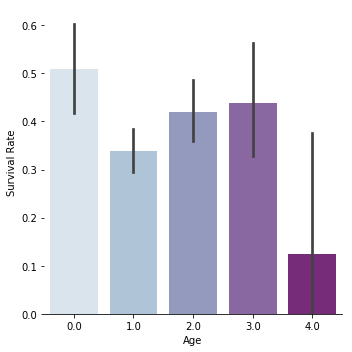

In [21]:
# explore Age groups
plot = sns.catplot(x='Age', y='Survived', data=dataset, kind='bar', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

In [22]:
# convert to indicator variables
dataset = pd.get_dummies(dataset, columns=['Age'])

In [23]:
dataset.head()

,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0
0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,0,1,0,0,0
1,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,0,1,0,0
2,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,0
3,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,0,1,0,0
4,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,0,0,1,0,0


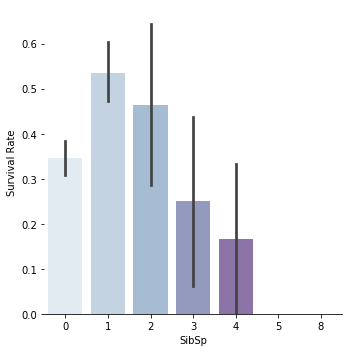

In [24]:
# explore SibSp vs Survival
plot = sns.catplot(x='SibSp', y='Survived', data=dataset, kind='bar', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

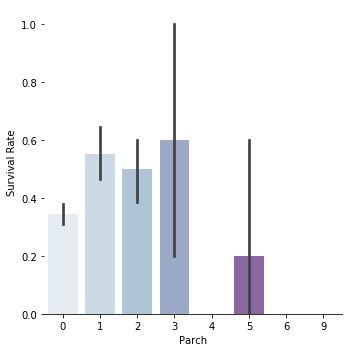

In [25]:
# explore Parch vs Survival
plot = sns.catplot(x='Parch', y='Survived', data=dataset, kind='bar', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

In [26]:
# create Fsize feature
dataset['Fsize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [27]:
dataset.head()

,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Fsize
0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,0,1,0,0,0,2
1,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,0,1,0,0,2
2,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,0,1
3,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,0,1,0,0,2
4,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,0,0,1,0,0,1


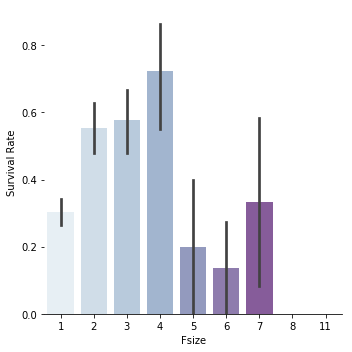

In [28]:
# explore Fsize vs Survived
plot = sns.catplot(x='Fsize', y='Survived', data=dataset, kind='bar', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

In [29]:
# divide Fsize feature
dataset.loc[dataset['Fsize'] == 1, 'Fsize'] = 0
dataset.loc[dataset['Fsize'] == 2, 'Fsize'] = 1
dataset.loc[(dataset['Fsize'] >=3) & (dataset['Fsize'] <=4), 'Fsize'] = 2
dataset.loc[dataset['Fsize'] >= 5, 'Fsize'] = 3

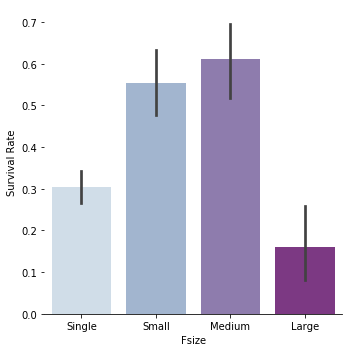

In [30]:
# explore Fsize groups vs Survived
plot = sns.catplot(x='Fsize', y='Survived', data=dataset, kind='bar', palette='BuPu')
plot = plot.set_xticklabels(['Single', 'Small', 'Medium', 'Large'])
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

In [31]:
# convert to indicator variables
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MediumF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

In [32]:
dataset.head()

,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Fsize,Single,SmallF,MediumF,LargeF
0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,0,1,0,0,0,1,1,0,0,0
1,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,0,1,0,0,1,1,0,0,0
2,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,0,0,0,0,0,0
3,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,0,1,0,0,1,1,0,0,0
4,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,0,0,1,0,0,0,0,0,0,0


In [33]:
# fill Fare with the median
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

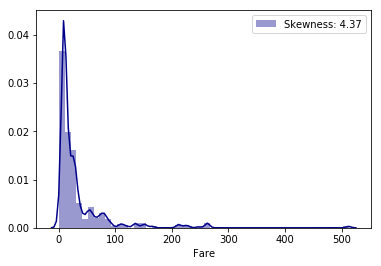

In [34]:
# explore Fare distribution
plot = sns.distplot(dataset['Fare'], 
                    label='Skewness: %.2f'%(dataset['Fare'].skew()), color='darkblue')
plot = plot.legend(loc='best')

In [35]:
# transform feature with the log function
dataset['Fare'] = dataset['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

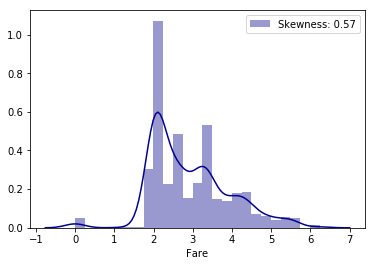

In [36]:
# explore Fare distribution again
plot = sns.distplot(dataset['Fare'], 
                    label='Skewness: %.2f'%(dataset['Fare'].skew()), color='darkblue')
plot = plot.legend(loc='best')

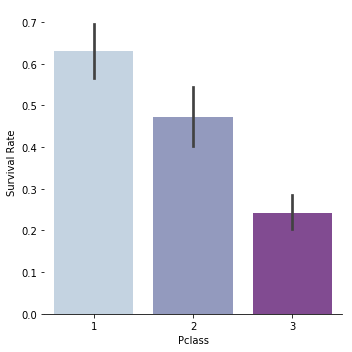

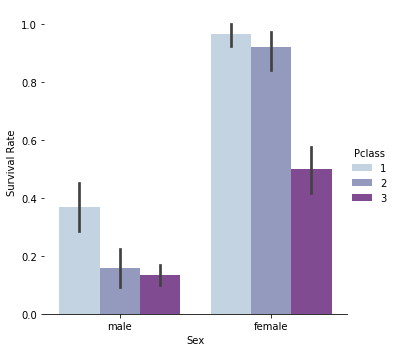

In [37]:
# explore Pclass vs Survived
plot = sns.catplot(x='Pclass',y='Survived', 
                   data=train_data, kind='bar', palette='BuPu')
plot.despine(left=True)
plot.set_ylabels('Survival Rate')

# explore Pclass vs Survived by Sex
plot = sns.catplot(x='Sex', y='Survived', hue='Pclass', 
                   data=train_data, kind='bar', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

In [38]:
dataset.head()

,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Fsize,Single,SmallF,MediumF,LargeF
0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,0,1,0,0,0,1,1,0,0,0
1,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,0,1,0,0,1,1,0,0,0
2,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,0,0,0,0,0,0
3,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,0,1,0,0,1,1,0,0,0
4,NaN,S,2.085672,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,0,0,1,0,0,0,0,0,0,0


In [39]:
# convert to indicator variables
dataset = pd.get_dummies(dataset, columns = ['Pclass'])

In [40]:
dataset.head()

,Cabin,Embarked,Fare,Name,Parch,Sex,SibSp,Survived,Ticket,Age_0.0,...,Age_3.0,Age_4.0,Fsize,Single,SmallF,MediumF,LargeF,Pclass_1,Pclass_2,Pclass_3
0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,male,1,0.0,A/5 21171,0,...,0,0,1,1,0,0,0,0,0,1
1,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,female,1,1.0,PC 17599,0,...,0,0,1,1,0,0,0,1,0,0
2,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,female,0,1.0,STON/O2. 3101282,0,...,0,0,0,0,0,0,0,0,0,1
3,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,female,1,1.0,113803,0,...,0,0,1,1,0,0,0,1,0,0
4,NaN,S,2.085672,"Allen, Mr. William Henry",0,male,0,0.0,373450,0,...,0,0,0,0,0,0,0,0,0,1


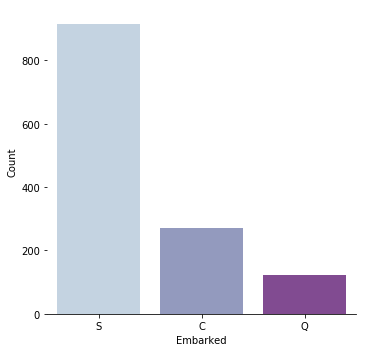

In [41]:
# explore Embarked frequency histogram
plot = sns.catplot('Embarked', data=dataset, kind='count', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Count')

In [42]:
# fill Embarked with the most frequent value
dataset['Embarked'] = dataset['Embarked'].fillna('S')

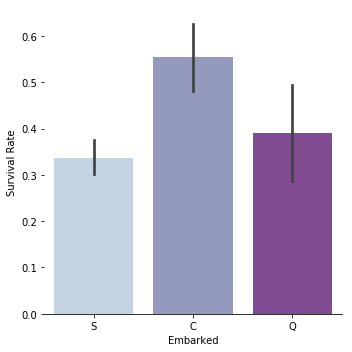

In [43]:
# explore Embarked vs Survived
plot = sns.catplot(x='Embarked', y='Survived', data=train_data, kind='bar', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

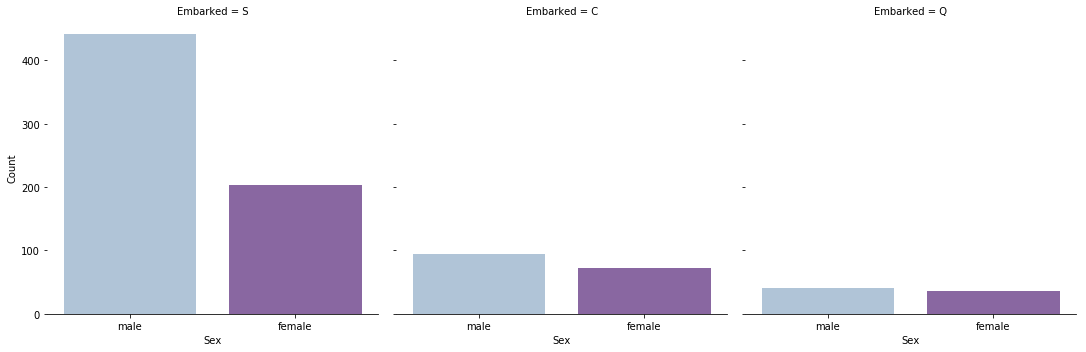

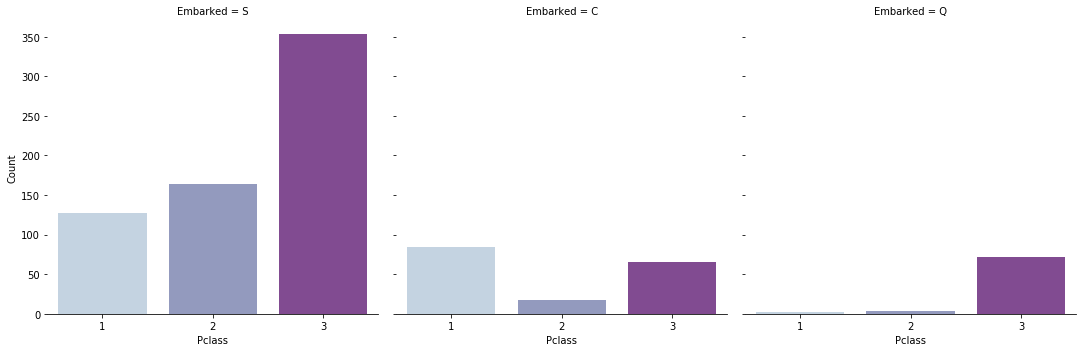

In [44]:
# explore Age vs Embarked
plot = sns.catplot('Sex', col='Embarked', data=train_data, kind='count', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Count')

# explore Pclass vs Embarked
plot = sns.catplot('Pclass', col='Embarked', data=train_data, kind='count', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Count')

In [45]:
# convert to indicator variables
dataset = pd.get_dummies(dataset, columns = ['Embarked'])

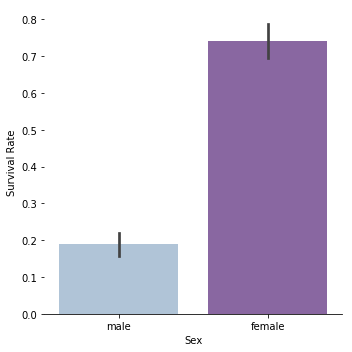

In [46]:
# explore Sex vs Survived
plot = sns.catplot(x='Sex',y='Survived', data=train_data, kind='bar', palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

In [47]:
# convert to indicator variables
dataset = pd.get_dummies(dataset, columns = ['Sex'])

In [48]:
# number of null values
dataset['Cabin'].isnull().sum()

1014

In [49]:
# show the first five not null values
dataset['Cabin'][dataset['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [50]:
# replace the Cabin number by the type of cabin 'X' if not
dataset['Cabin'] = pd.Series([x[0] if not pd.isnull(x) else 'X' for x in dataset['Cabin']])

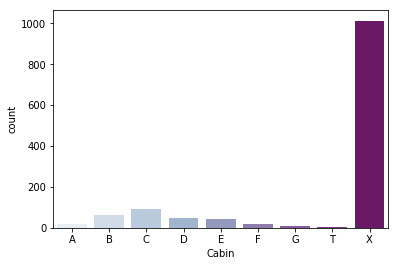

In [51]:
# explore Cabin frequency histogram
plot = sns.countplot(dataset['Cabin'], 
                     order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'], palette='BuPu')

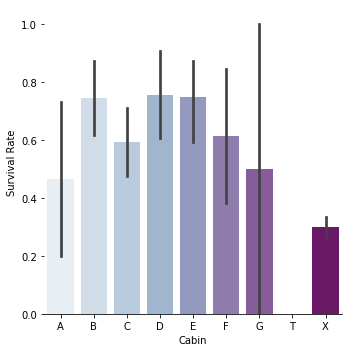

In [52]:
# explore Cabin vs Survived
plot = sns.catplot(x='Cabin', y='Survived', data=dataset, kind='bar', 
                   order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'], palette='BuPu')
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

In [53]:
# convert to indicator variables
dataset = pd.get_dummies(dataset, columns=['Cabin'], prefix='Cabin')

In [54]:
# show the first five values
dataset['Name'].head()


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [55]:
# create Title feature from Name
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [56]:
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

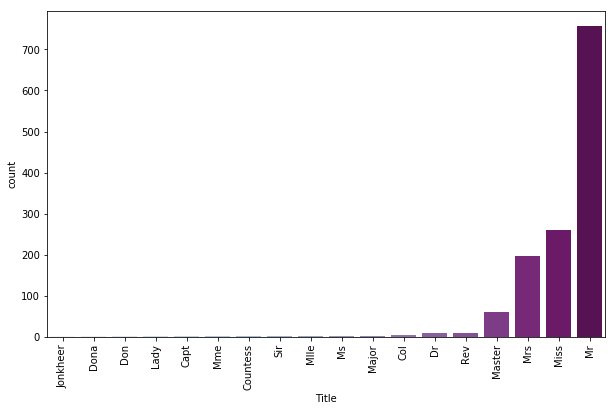

In [57]:
# explore Title frequency histogram
fig, ax = plt.subplots(figsize=(10, 6))
plot = sns.countplot(x='Title',data=dataset, palette='BuPu', 
                     order=dataset['Title'].value_counts(ascending=True).index, ax=ax)
plot = plt.setp(plot.get_xticklabels(), rotation=90) 

In [58]:
# convert Title feature to categorical values
dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt',
                                             'Col','Don', 'Dr', 'Major', 'Rev', 'Sir',
                                             'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].map({'Mr': 0, 'Miss': 1, 'Ms': 1, 'Mlle': 1,
                                         'Mrs': 1, 'Mme': 1, 'Master': 2, 'Rare': 3})

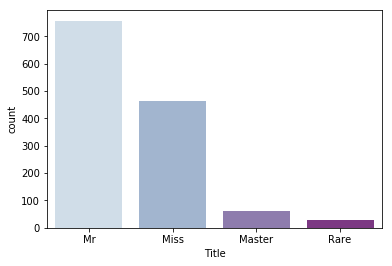

In [59]:
# explore Title frequency histogram
plot = sns.countplot(dataset['Title'], palette='BuPu')
plot = plot.set_xticklabels(['Mr', 'Miss', 'Master', 'Rare'])

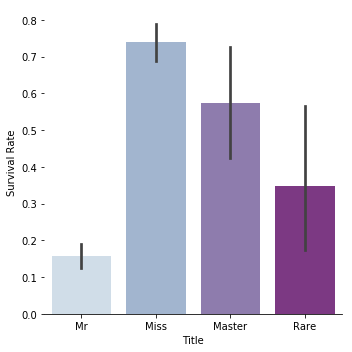

In [60]:
# explore Title vs Survived
plot = sns.catplot(x='Title', y='Survived', data=dataset, kind='bar', palette='BuPu')
plot = plot.set_xticklabels(['Mr', 'Miss', 'Master', 'Rare'])
plot.despine(left=True)
plot = plot.set_ylabels('Survival Rate')

In [61]:
# drop Name feature
dataset.drop(labels=['Name'], axis=1, inplace=True)

In [62]:
# show the first five values
dataset['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [63]:
# treat Ticket by extracting the ticket prefix. 'X' if not prefix
tickets = []
for i in list(dataset['Ticket']):
    if not i.isdigit() :
        tickets.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        tickets.append("X")
        
dataset['Ticket'] = tickets

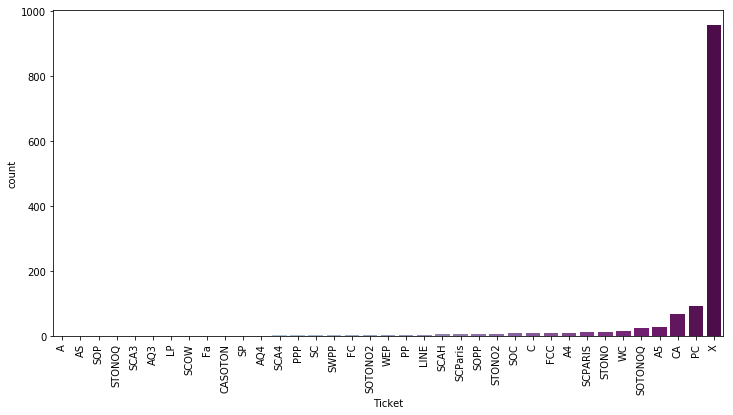

In [64]:
# explore Ticket frequency histogram
fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.countplot(x='Ticket', data=dataset, 
                     order=dataset['Ticket'].value_counts(ascending=True).index, palette='BuPu')
plot = plt.setp(plot.get_xticklabels(), rotation=90)

In [65]:
# convert to indicator variables
dataset = pd.get_dummies(dataset, columns=['Ticket'])

In [66]:
# show the first five lines of dataset
dataset.head()


,Fare,Parch,SibSp,Survived,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Fsize,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X
0,1.981001,0,1,0.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.266662,0,1,1.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.070022,0,0,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.972177,0,1,1.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2.085672,0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# separate our dataset on train and test data
train = dataset[:train_data.shape[0]]
test = dataset[train_data.shape[0]:]
test.drop('Survived', axis=1, inplace=True)

In [68]:
# separate train features and label
train['Survived'] = train['Survived'].astype(int)

Y_train = train['Survived']
X_train = train.drop(['Survived'], axis=1)

In [90]:
# Scale the data with respect to the training data set
scaler = StandardScaler()
scaler.fit(X_train,Y_train)
X_scaled_train = scaler.transform(X_train,Y_train)

In [91]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

ModuleNotFoundError: No module named 'xgboost'

In [155]:
# initialization algorithms
algorithms = {# Ensemble Methods
              ensemble.AdaBoostClassifier(),
              ensemble.BaggingClassifier(),
              ensemble.ExtraTreesClassifier(),
              ensemble.GradientBoostingClassifier(),
              ensemble.RandomForestClassifier(),

              # Gaussian Processes
              gaussian_process.GaussianProcessClassifier(),
    
              # Generalized Linear Models
              linear_model.LogisticRegressionCV(),
              linear_model.PassiveAggressiveClassifier(),
              linear_model.RidgeClassifierCV(),
              linear_model.SGDClassifier(),
              linear_model.Perceptron(),
    
              # Navies Bayes
              naive_bayes.BernoulliNB(),
              naive_bayes.GaussianNB(),
    
              # Nearest Neighbor
              neighbors.KNeighborsClassifier(),
    
              # Support Vector Machine
              svm.SVC(probability=True),
              svm.NuSVC(probability=True),
              svm.LinearSVC(),
    
              # Trees    
              tree.DecisionTreeClassifier(),
              tree.ExtraTreeClassifier(),
    
              # Discriminant Analysis
              discriminant_analysis.LinearDiscriminantAnalysis(),
              discriminant_analysis.QuadraticDiscriminantAnalysis(),

              # XGBoost
              XGBClassifier() }


In [156]:
# split dataset in cross-validation
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, 
                                        train_size=.6, random_state=0)

In [157]:
# create table to compare algorithms
algorithm_results = pd.DataFrame(columns=['Name', 'Parameters', 
                                          'Train Accuracy', 'Test Accuracy', 'STD'])

In [158]:
# index through algorithms and save performance to table
index = 0

predictions = pd.DataFrame()
predictions['Target'] = Y_train

for alg in algorithms:

    # set name and parameters
    name = alg.__class__.__name__
    algorithm_results.loc[index, 'Name'] = name
    algorithm_results.loc[index, 'Parameters'] = str(alg.get_params())

    # score model with cross validation
    cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv=cv_split)

    algorithm_results.loc[index, 'Train Accuracy'] = cv_results['train_score'].mean()
    algorithm_results.loc[index, 'Test Accuracy'] = cv_results['test_score'].mean()   

    algorithm_results.loc[index, 'STD'] = cv_results['test_score'].std()

    alg.fit(X_train, Y_train)
    
    # algoritm prediction
    predictions[name] = alg.predict(X_train)
    
    index+=1

    
# sort table
algorithm_results.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

In [159]:
 #print algorithms results table
algorithm_results

,Name,Parameters,Train Accuracy,Test Accuracy,STD
11,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.910487,0.83097,0.0192481
8,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.88839,0.821642,0.0180344
14,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.864419,0.81903,0.015587
9,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.905056,0.817537,0.0162174
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.821723,0.816418,0.0174058
3,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.82191,0.816418,0.0176442
21,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.851311,0.815299,0.017038
13,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.946629,0.81306,0.0319439
19,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.827341,0.811194,0.0159359
5,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.947191,0.808955,0.0251305
